<a href="https://colab.research.google.com/github/DLSireesha/Weather_Prediction/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_curve,accuracy_score,roc_auc_score

In [ ]:
data=pd.read_csv("/content/playsheet_dataset.csv")
data.head()

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp      14 non-null     object
 2   Humidity  14 non-null     object
 3   Windy     14 non-null     object
 4   Play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [ ]:
data.describe()

,Outlook,Temp,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Rainy,Mild,High,f,yes
freq,5,6,7,8,9


In [ ]:
data.isnull().sum()

Outlook     0
Temp        0
Humidity    0
Windy       0
Play        0
dtype: int64

In [ ]:
data['Outlook'].value_counts()

Rainy       5
Sunny       5
Overcast    4
Name: Outlook, dtype: int64

In [ ]:
data['Temp'].value_counts()

Mild    6
Hot     4
Cool    4
Name: Temp, dtype: int64

In [ ]:
data['Humidity'].value_counts()

High      7
Normal    7
Name: Humidity, dtype: int64

In [ ]:
data['Windy'].value_counts()

f    8
t    6
Name: Windy, dtype: int64

In [ ]:
data['Play'].value_counts()

yes    9
no     5
Name: Play, dtype: int64

In [ ]:
data.replace({'Outlook':{'Rainy':0,'Sunny':1,'Overcast':2}},inplace=True)
data.replace({'Temp':{'Mild':0,'Hot':1,'Cool':2}},inplace=True)
data.replace({'Humidity':{'Normal':0,'High':1}},inplace=True)
data.replace({'Windy':{'f':0,'t':1}},inplace=True)
data.replace({'Play':{'yes':0,'no':1}},inplace=True)
data.head()

,Outlook,Temp,Humidity,Windy,Play
0,0,1,1,0,1
1,0,1,1,1,1
2,2,1,1,0,0
3,1,0,1,0,0
4,1,2,0,0,0


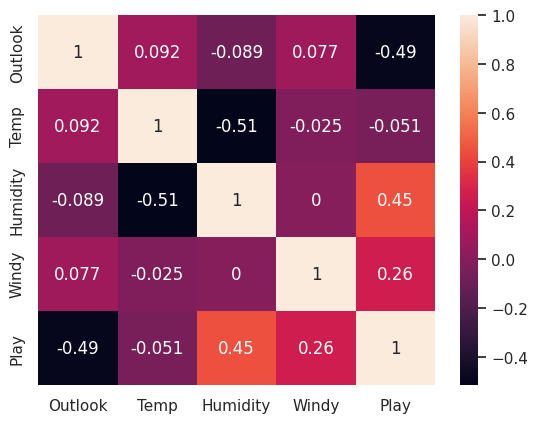

In [ ]:
c=data.corr()
sns.set_theme(style='white')
sns.heatmap(c,annot=True)
plt.show()

In [ ]:
x=data.iloc[ : , :-1]
y=data.iloc[ : ,-1]
print(x.shape)
print(y.shape)

(14, 4)
(14,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
l=GaussianNB()
l.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_p=l.predict(x_train)
print('classification report:\n',classification_report(y_p,y_train))
print('accuracy score:',accuracy_score(y_p,y_train))
print('Confusion matrix:\n',confusion_matrix(y_p,y_train))

classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.67      1.00      0.80         2

    accuracy                           0.91        11
   macro avg       0.83      0.94      0.87        11
weighted avg       0.94      0.91      0.92        11

accuracy score: 0.9090909090909091
Confusion matrix:
 [[8 1]
 [0 2]]


In [ ]:
print("precision:",precision_score(y_p,y_train))
print("recall",recall_score(y_p,y_train))
print("f1 score:",f1_score(y_p,y_train))

precision: 0.6666666666666666
recall 1.0
f1 score: 0.8


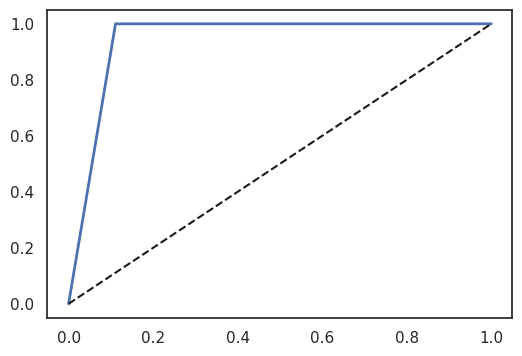

In [ ]:
fpr,tpr,threshold=roc_curve(y_p,y_train)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')

In [ ]:
print('roc auc score:',roc_auc_score(y_p,y_train))

roc auc score: 0.9444444444444444


In [ ]:
x_p=l.predict(x_test)
print("classification report:\n",classification_report(x_p,y_test))
print('accuracy score:',accuracy_score(x_p,y_test))
print('Confusion matrix:\n',confusion_matrix(x_p,y_test))

classification report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

accuracy score: 0.6666666666666666
Confusion matrix:
 [[1 1]
 [0 1]]


In [ ]:
print("precision:",precision_score(x_p,y_test))
print("recall",recall_score(x_p,y_test))
print("f1 score:",f1_score(x_p,y_test))

precision: 0.5
recall 1.0
f1 score: 0.6666666666666666


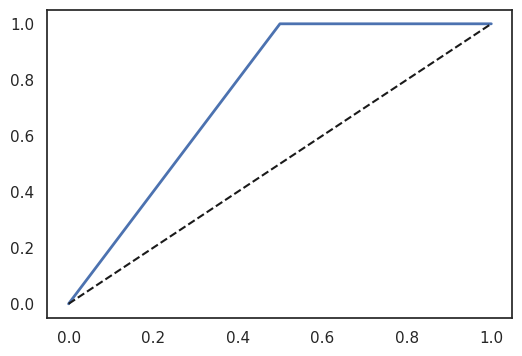

In [ ]:
fpr,tpr,threshold=roc_curve(x_p,y_test)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')

In [ ]:
print('roc auc score:',roc_auc_score(y_p,y_train))

roc auc score: 0.9444444444444444
